In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# Importing csv File
df1 = pd.read_csv('NID_revised_cleanData.csv')

In [4]:
# Looking at the first five rows
df1.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT,CT_Status,CT_Indicator
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.0,Out-of SLA,Yellow
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.0,Out-of SLA,Yellow
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226.0,Out-of SLA,Yellow
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C,91.0,With-in SLA,Green
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E,117.0,With-in SLA,Green


In [5]:
# What type of values are stored in the columns?
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1593 non-null   object 
 1   Metro           1593 non-null   object 
 2   SiteType        1593 non-null   object 
 3   DeploymentType  1593 non-null   object 
 4   NIDPM           1593 non-null   object 
 5   DPM             1593 non-null   object 
 6   IsMainstream    1593 non-null   bool   
 7   FacilityCode    1593 non-null   object 
 8   ClassType       1593 non-null   object 
 9   CT              1593 non-null   float64
 10  CT_Status       1593 non-null   object 
 11  CT_Indicator    1593 non-null   object 
dtypes: bool(1), float64(1), object(10)
memory usage: 138.6+ KB


In [6]:
# Let's look at some statistical information about our dataframe.
df1.describe()

,CT
count,1593.000000
mean,363.947269
std,241.989004
min,3.000000
25%,189.000000
50%,333.000000
75%,463.000000
max,1219.000000


In [7]:
df1.drop(['CT_Status','CT_Indicator'],axis=1,inplace=True)

In [8]:
df1['IsMainstream']=df1['IsMainstream'].astype('object')

In [10]:
#define X
x=df1.drop('CT',axis=1)

#define y
y=df1['CT']

In [11]:
x.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E


In [13]:
le=LabelEncoder()
x_encoded=x.apply(le.fit_transform)

In [15]:
x_encoded.sample(5)

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType
973,1,13,2,17,12,10,0,116,2
1578,0,27,5,1,29,12,0,81,0
1081,0,50,1,17,2,54,0,126,6
377,2,189,2,5,21,6,0,695,2
36,2,37,2,1,35,43,0,128,2


In [20]:
#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.3,random_state=123)

In [21]:
print(x_train.shape)
print(x_test.shape)

(1115, 9)
(478, 9)


In [39]:
rf=RandomForestRegressor(max_depth=10,n_estimators=300)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=300)

In [40]:
#prediction
y_train_predict=rf.predict(x_train)
y_test_predict=rf.predict(x_test)

In [41]:
#Error calculation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
train_MAE = mean_absolute_error(y_train, y_train_predict)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
test_MAE = mean_absolute_error(y_test, y_test_predict)

In [42]:
print('rmse_train :',train_rmse, 'MAE_train', train_MAE)
print('rmse_test :',test_rmse, 'MAE_test', test_MAE)

rmse_train : 87.38460292826637 MAE_train 60.429967281917236
rmse_test : 166.8508306086333 MAE_test 112.63389816445715


In [43]:
pd.DataFrame({'gini':rf.feature_importances_, 'varname':x_train.columns}).sort_values('gini', ascending=False)

,gini,varname
5,0.204599,DPM
3,0.173179,DeploymentType
4,0.160196,NIDPM
2,0.127536,SiteType
7,0.106180,FacilityCode
1,0.084575,Metro
0,0.081261,Region
8,0.057472,ClassType
6,0.005001,IsMainstream


Text(0, 0.5, 'Cycle Time')

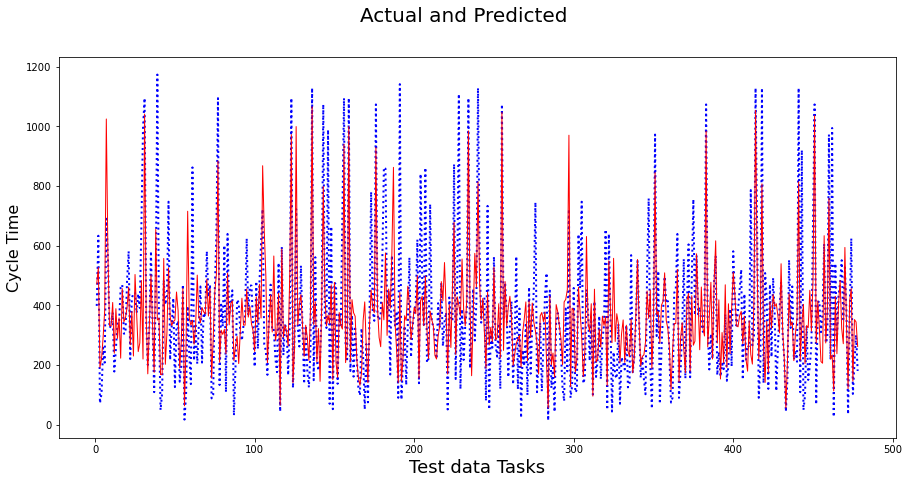

In [44]:
#### Actual vs Predicted
c = [i for i in range(1,479,1)]
fig = plt.figure(figsize=(15,7))
plt.plot(c,y_test, color="blue", linewidth=2, linestyle=":")
plt.plot(c,y_test_predict, color="red",  linewidth=1, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Test data Tasks', fontsize=18)                               # X-label
plt.ylabel('Cycle Time', fontsize=16)                             # Y-label

<AxesSubplot:xlabel='CT', ylabel='Density'>

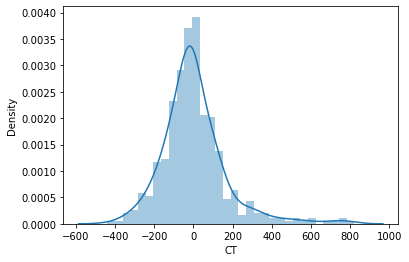

In [45]:
sns.distplot(y_test-y_test_predict)

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [34]:
RF1 = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300,400],
    'max_depth': [10,12,15,20,25,30,35,40,37,None]
}

cv = GridSearchCV(RF1, parameters, cv=3,n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)
print_results(cv)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   39.6s finished


BEST PARAMS: {'max_depth': 10, 'n_estimators': 300}

0.534 (+/-0.083) for {'max_depth': 10, 'n_estimators': 100}
0.535 (+/-0.094) for {'max_depth': 10, 'n_estimators': 200}
0.536 (+/-0.078) for {'max_depth': 10, 'n_estimators': 300}
0.534 (+/-0.08) for {'max_depth': 10, 'n_estimators': 400}
0.527 (+/-0.07) for {'max_depth': 12, 'n_estimators': 100}
0.532 (+/-0.074) for {'max_depth': 12, 'n_estimators': 200}
0.527 (+/-0.075) for {'max_depth': 12, 'n_estimators': 300}
0.531 (+/-0.075) for {'max_depth': 12, 'n_estimators': 400}
0.521 (+/-0.057) for {'max_depth': 15, 'n_estimators': 100}
0.528 (+/-0.079) for {'max_depth': 15, 'n_estimators': 200}
0.524 (+/-0.071) for {'max_depth': 15, 'n_estimators': 300}
0.526 (+/-0.068) for {'max_depth': 15, 'n_estimators': 400}
0.526 (+/-0.066) for {'max_depth': 20, 'n_estimators': 100}
0.52 (+/-0.084) for {'max_depth': 20, 'n_estimators': 200}
0.53 (+/-0.079) for {'max_depth': 20, 'n_estimators': 300}
0.528 (+/-0.077) for {'max_depth': 20, 'n_estimator

In [48]:
y_test_predict=pd.DataFrame(y_test_predict)

In [51]:
y_test_predict.to_csv('y_pred_test.csv')
y_test.to_csv('y_test.csv')